<a href="https://colab.research.google.com/github/arlundgrenbyui/cse480-notebooks/blob/master/08_2_Ponder_and_Prove_Turing_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ponder and Prove Turing Machines
## Due: Saturday, 27 February 2021, 11:59 pm

In [ ]:
Brother_Neff_feedback = '''
Excellent work, Andrew! Did you work with Jesse on this?
Or have you two (Dugduo now that Brad is gone) decided 
to go your separate ways?

To get around the 1000 fuel limit, it might be interesting to try
the http://morphett.info/turing/turing.html TM simulator with your
Collatz conjecture code!
'''

## TODO Study Examples

In the folders

Jove/For_CS3100_Fall2020/17_DTMs_and_NDTMs

and 

Jove/For_CS3100_Fall2020/18_More_TM_Exs

you will find many examples of Deterministic Turing Machines, and Nondeterministic Turing Machines. Study these carefully!

In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *
from jove.JoveEditor import *
from jove.AnimateTM import * #-- usage: AnimateTM(whas101DTM, FuseEdges=True)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 4634, done.
remote: Total 4634 (delta 0), reused 0 (delta 0), pack-reused 4634
Receiving objects: 100% (4634/4634), 7.38 MiB | 19.07 MiB/s, done.
Resolving deltas: 100% (3005/3005), done.
You may use any of these help commands:
help(step_tm)
help(run_tm)
help(explore_tm)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

 "help(JoveEditor)" gives you info on the generic animation panel that animates all machines. 


Generating LALR tables


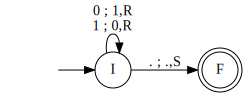

In [ ]:
flipperTM = md2mc('''TM
I : . ; ., S -> F
I : 0 ; 1, R -> I
I : 1 ; 0, R -> I
''')
DOflipperTM = dotObj_tm(flipperTM, FuseEdges=True)
DOflipperTM

In [ ]:
# The following display(...) call is needed to see the animation buttons in Colab
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))
AnimateTM(flipperTM, FuseEdges=True)

## TODO Write a Summary

Describe what you learned about TMs of both varieties.

Turing machines are very interesting, I found myself greatly enjoying the construction of Turing machines in this assignment. One of the first things I noticed is how powerful, albeit slow, they are. I was greatly impressed by the capabilities of the machines as I created the TM to copy a string. They are so much more powerful than a regular DFA or NFA!

Although I did not experiment much with NDTM, I can imagine their usefulness. Creating Turing machines that perform tasks in parallel is a concept that NDTMs can provide, especially if an NDTM had multiple tapes.

I started to feel like TMs almost have a "personality" in the same way that a programming language does. They do exactly what you tell them to do. When I was creating the final Turing machine, I ran into a problem where an asterisk was created between every digit on the LHS instead of after every expression. I was slightly exasperated, but then I remembered that it was doing exactly what I told it to do. That made me laugh!

Overall I think that studying TMs has given me a different perspective on computation and writing programs.

## TODO Create a DTM to Delete a Character

This task is to delete a character from the tape string. Deleting the current symbol means transforming the tape from $x\sigma y$ to $xy$ where $\sigma$ is any symbol, including a blank, and $y$ is a string of nonblank symbols. Assume the input alphabet is $\{a, b\}$.

HINT: Use a couple of states (labeled $q_a$ and $q_b$, say) for your TM to remember a symbol between the time it is erased and the time it is copied in the next square to the left. (The complete DTM requires about 6 states total, with 12 transitions.)


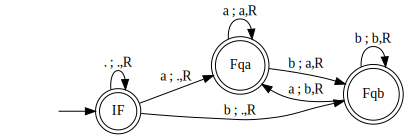

In [ ]:
del_last_TM = md2mc('''TM
IF : . ; ., R -> IF
IF : a ; ., R -> Fqa
IF : b ; ., R -> Fqb

Fqa : a ; a, R -> Fqa
Fqa : b ; a, R -> Fqb

Fqb : a ; b, R -> Fqa
Fqb : b ; b, R -> Fqb
''')
DO_del_last_TM = dotObj_tm(del_last_TM, FuseEdges=True)
DO_del_last_TM

In [ ]:
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))
AnimateTM(del_last_TM, FuseEdges=True)

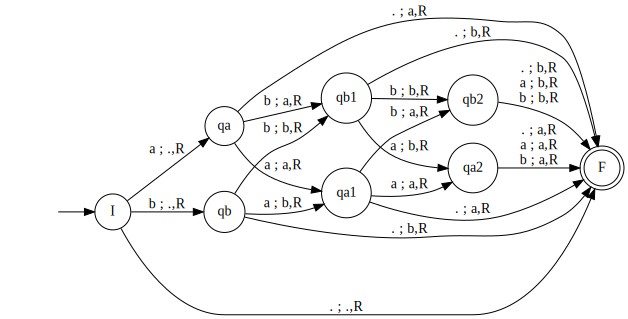

In [ ]:
del_fourth_TM = md2mc('''TM
I : . ; ., R -> F
I : a ; ., R -> qa
I : b ; ., R -> qb

qa : a ; a, R -> qa1
qa : b ; a, R -> qb1
qa : . ; a, R -> F

qb : a ; b, R -> qa1
qb : b ; b, R -> qb1
qb : . ; b, R -> F

qa1 : a ; a, R -> qa2
qa1 : b ; a, R -> qb2
qa1 : . ; a, R -> F

qb1 : a ; b, R -> qa2
qb1 : b ; b, R -> qb2
qb1 : . ; b, R -> F

qa2 : a ; a, R -> F
qa2 : b ; a, R -> F
qa2 : . ; a, R -> F

qb2 : a ; b, R -> F
qb2 : b ; b, R -> F
qb2 : . ; b, R -> F
''')
DO_del_fourth_TM = dotObj_tm(del_fourth_TM, FuseEdges=True)
DO_del_fourth_TM

In [ ]:
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))
AnimateTM(del_fourth_TM, FuseEdges=True)

## TODO Create a DTM to Insert a Character

This task is the opposite of the first one, namely, to insert a character into the tape string. Inserting the symbol $\sigma$ is done virtually the same way as deleting, except that the single pass goes from left to right, symbols are moved to the right instead of to the left, and the move that starts things off writes $\sigma$ instead of a blank.


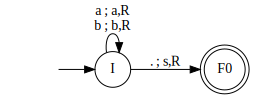

In [ ]:
ins_TM = md2mc('''TM
I : . ; s, R -> F0
I : a ; a, R -> I
I : b ; b, R -> I

!!IF0 : . ; ., 

!!Fqa : a ; a, R -> Fqa
!!Fqa : b ; a, R -> Fqb

!!Fqb : a ; b, R -> Fqa
!!Fqb : b ; b, R -> Fqb
''')
DO_ins_TM = dotObj_tm(ins_TM, FuseEdges=True)
DO_ins_TM

In [ ]:
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))
AnimateTM(ins_TM, FuseEdges=True)

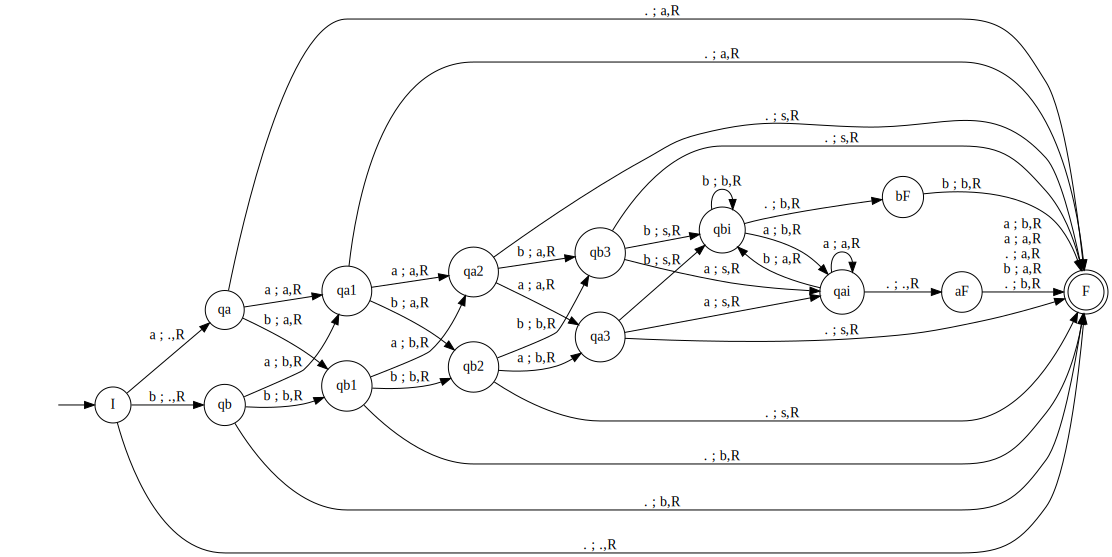

In [ ]:
ins_fourth_TM = md2mc('''TM
I : . ; ., R -> F
I : a ; ., R -> qa
I : b ; ., R -> qb

qa : a ; a, R -> qa1
qa : b ; a, R -> qb1
qa : . ; a, R -> F

qb : a ; b, R -> qa1
qb : b ; b, R -> qb1
qb : . ; b, R -> F

qa1 : a ; a, R -> qa2
qa1 : b ; a, R -> qb2
qa1 : . ; a, R -> F

qb1 : a ; b, R -> qa2
qb1 : b ; b, R -> qb2
qb1 : . ; b, R -> F

qa2 : a ; a, R -> qa3
qa2 : b ; a, R -> qb3
qa2 : . ; s, R -> F

qb2 : a ; b, R -> qa3
qb2 : b ; b, R -> qb3
qb2 : . ; s, R -> F

qa3 : a ; s, R -> qai
qa3 : b ; s, R -> qbi
qa3 : . ; s, R -> F

qb3 : a ; s, R -> qai
qb3 : b ; s, R -> qbi
qb3 : . ; s, R -> F

qai : a ; a, R -> qai
qai : b ; a, R -> qbi
qai : . ; ., R -> aF

qbi : a ; b, R -> qai
qbi : b ; b, R -> qbi
qbi : . ; b, R -> bF

aF : a ; a, R -> F
aF : b ; a, R -> F
aF : . ; a, R -> F

bF : b ; b, R -> F
aF : a ; b, R -> F
aF : . ; b, R -> F
''')
DO_ins_fourth_TM = dotObj_tm(ins_fourth_TM, FuseEdges=True)
DO_ins_fourth_TM

In [ ]:
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))
AnimateTM(ins_fourth_TM, FuseEdges=True)

## TODO Create a DTM to Copy a String

Let $\sqcup$ represent the blank symbol. A *Copy* DTM starts with tape $\sqcup\ x$ where $x$ is a string of nonblank symbols, and ends up with $\sqcup\ x \sqcup x$. Again, assume the input alphabet is $\{a, b\}$.

HINT: This DTM requires about 10 states, and not quite double that many transitions.

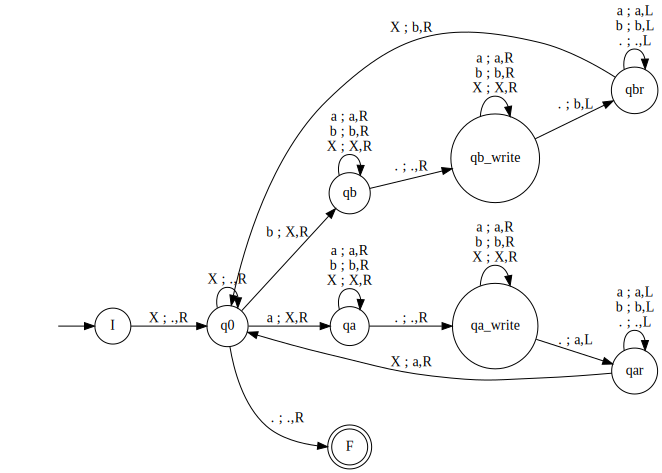

In [ ]:
copy_TM = md2mc('''TM
I : X ; ., R -> q0

q0 : a ; X, R -> qa
q0 : b ; X, R -> qb
q0 : . ; ., R -> F
q0 : X ; ., R -> q0

qa : a ; a, R -> qa
qa : b ; b, R -> qa
qa : . ; ., R -> qa_write
qa : X ; X, R -> qa

qa_write : a ; a, R -> qa_write
qa_write : b ; b, R -> qa_write
qa_write : . ; a, L -> qar
qa_write : X ; X, R -> qa_write

qb : a ; a, R -> qb
qb : b ; b, R -> qb
qb : . ; ., R -> qb_write
qb : X ; X, R -> qb

qb_write : a ; a, R -> qb_write
qb_write : b ; b, R -> qb_write
qb_write : . ; b, L -> qbr
qb_write : X ; X, R -> qb_write

qar : a ; a, L -> qar
qar : b ; b, L -> qar
qar : . ; ., L -> qar
qar : X ; a, R -> q0

qbr : a ; a, L -> qbr
qbr : b ; b, L -> qbr
qbr : . ; ., L -> qbr
qbr : X ; b, R -> q0
''')
DO_copy_TM = dotObj_tm(copy_TM, FuseEdges=True)
DO_copy_TM

In [ ]:
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))
AnimateTM(copy_TM, FuseEdges=True)

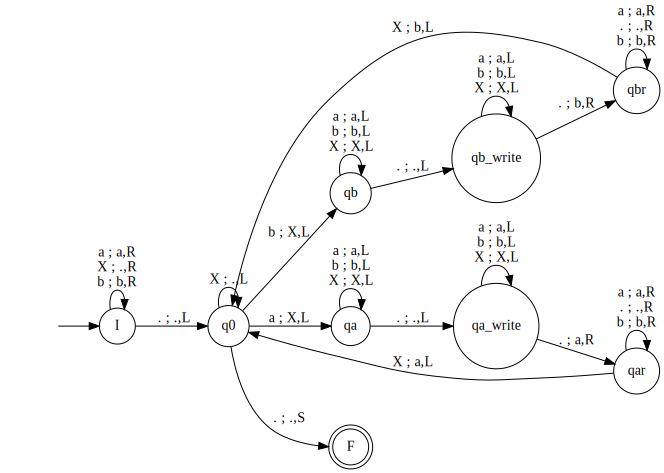

In [ ]:
copy_pre_TM = md2mc('''TM
I : X ; ., R -> I
I : a ; a, R -> I
I : b ; b, R -> I
I : . ; ., L -> q0 

q0 : a ; X, L -> qa
q0 : b ; X, L -> qb
q0 : . ; ., S -> F
q0 : X ; ., L -> q0

qa : a ; a, L -> qa
qa : b ; b, L -> qa
qa : . ; ., L -> qa_write
qa : X ; X, L -> qa

qa_write : a ; a, L -> qa_write
qa_write : b ; b, L -> qa_write
qa_write : . ; a, R -> qar
qa_write : X ; X, L -> qa_write

qb : a ; a, L -> qb
qb : b ; b, L -> qb
qb : . ; ., L -> qb_write
qb : X ; X, L -> qb

qb_write : a ; a, L -> qb_write
qb_write : b ; b, L -> qb_write
qb_write : . ; b, R -> qbr
qb_write : X ; X, L -> qb_write

qar : a ; a, R -> qar
qar : b ; b, R -> qar
qar : . ; ., R -> qar
qar : X ; a, L -> q0

qbr : a ; a, R -> qbr
qbr : b ; b, R -> qbr
qbr : . ; ., R -> qbr
qbr : X ; b, L -> q0
''')
DO_copy_pre_TM = dotObj_tm(copy_pre_TM, FuseEdges=True)
DO_copy_pre_TM

In [ ]:
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))
AnimateTM(copy_pre_TM, FuseEdges=True)

## TODO Refresh Your Knowledge of the 3x+1 Conjecture

The code on page 200 does the 3x+1 Conjecture testing recursively:

In [ ]:
def tep1(x):
    print(x)
    if (x==1):
        return 1
    elif (x%2 == 0):
        return tep1(x/2)
    else:
        return tep1(3*x+1)

print(tep1(3))
print(tep1(191))
print(tep1(19192949297080))
print(tep1(191929492970809272397923472398492839482))
print(tep1(191929492970809272397923472398492839482938492))

3
10
5.0
16.0
8.0
4.0
2.0
1.0
1
191
574
287.0
862.0
431.0
1294.0
647.0
1942.0
971.0
2914.0
1457.0
4372.0
2186.0
1093.0
3280.0
1640.0
820.0
410.0
205.0
616.0
308.0
154.0
77.0
232.0
116.0
58.0
29.0
88.0
44.0
22.0
11.0
34.0
17.0
52.0
26.0
13.0
40.0
20.0
10.0
5.0
16.0
8.0
4.0
2.0
1.0
1
19192949297080
9596474648540.0
4798237324270.0
2399118662135.0
7197355986406.0
3598677993203.0
10796033979610.0
5398016989805.0
16194050969416.0
8097025484708.0
4048512742354.0
2024256371177.0
6072769113532.0
3036384556766.0
1518192278383.0
4554576835150.0
2277288417575.0
6831865252726.0
3415932626363.0
10247797879090.0
5123898939545.0
15371696818636.0
7685848409318.0
3842924204659.0
11528772613978.0
5764386306989.0
17293158920968.0
8646579460484.0
4323289730242.0
2161644865121.0
6484934595364.0
3242467297682.0
1621233648841.0
4863700946524.0
2431850473262.0
1215925236631.0
3647775709894.0
1823887854947.0
5471663564842.0
2735831782421.0
8207495347264.0
4103747673632.0
2051873836816.0
1025936918408.0
51296845

Two Python techniques --- "memoizing" and "listifying" --- make for faster code:

In [ ]:
def memoize(func):
    results = {}
    def inner(i):
        if not i in results:
            results[i] = func(i)
        return results[i]
    return inner

def listify(func):
    def inner(x):
        return list(func(x))
    return inner

@memoize
def tep1(x):
    return 1 if x == 2 else tep1(x/2) if x%2 == 0 else tep1(3*x+1)

@listify
def tepmany(x):
    for i in range(1, x+1):
        yield tep1(i)

print(max(tepmany(100000)))

1


# TODO Modify a NON-Trivial Turing Machine Program

The Turing machine program on page 202 performs the continuing 3x+1 transformation on an input that is a binary number. So for example if the
initial tape has

$11$

which is the binary representation of the decimal number three, the final tape
will have

$1$

on it.

Modify the program so that a trace of all intermediate results appears on the output tape, e.g.:

$11*1010*101*10000*1000*100*10*1$

which separates with a star the binary representations of the numbers in the
continuing 3x+1 transformation from 3 to 10 to 5 to 16 to 8 to 4 to 2 to 1.


This Turing machine accomplishes the goal of creating the string to exhibit the steps of the 3x+1 transformation. However, it is extremely inefficient. I don't have time to prune this machine back into one that is more effective. If the input string is 101, then the machine will have enough fuel to create the valid string. Jove limits the maximum fuel count to 1000, so there is not enough fuel to create the strings for more computationally intensive numbers. If there was not a fuel limit, the machine would create valid output.

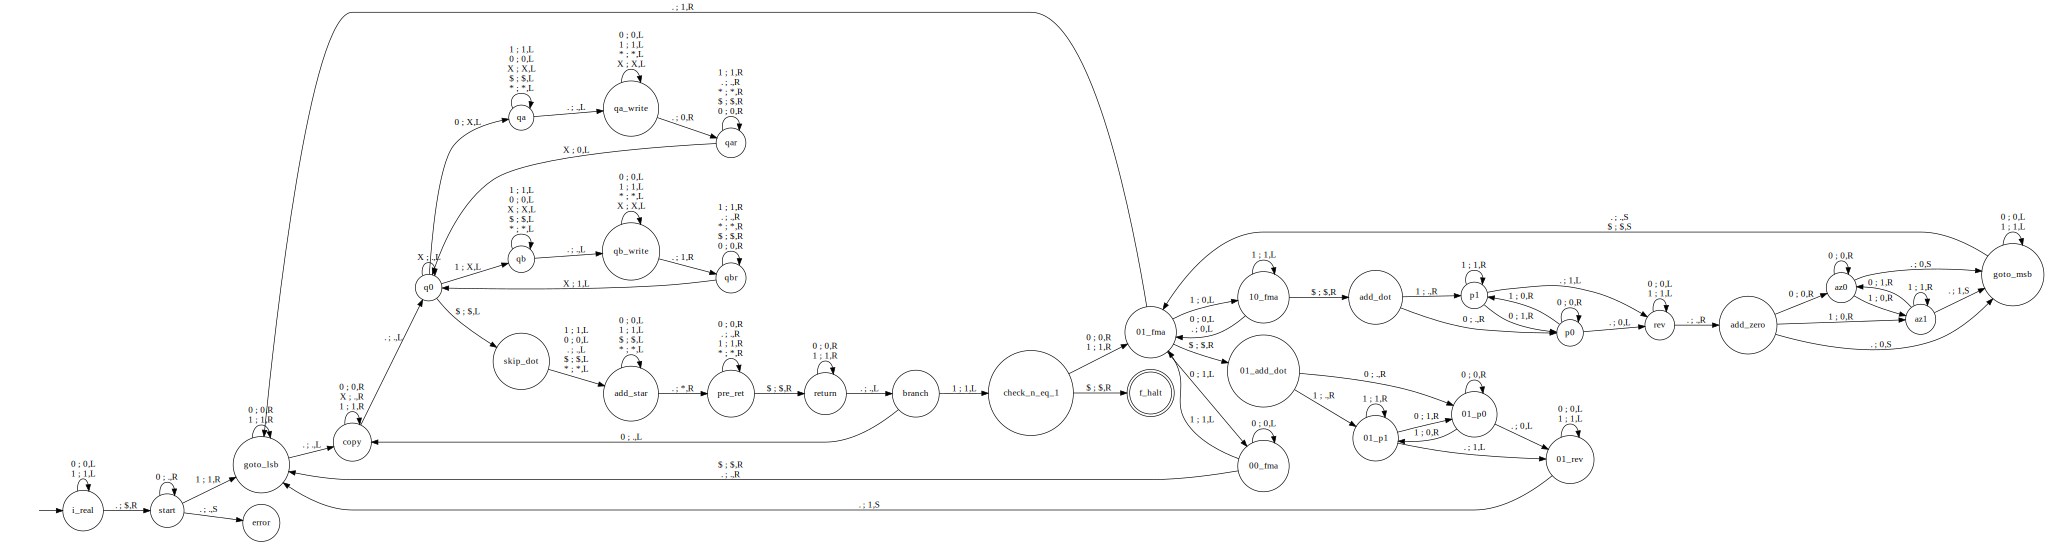

In [ ]:
nt_TM = md2mc('''
TM !!
i_real : 0; 0, L -> i_real
i_real : 1; 1, L -> i_real
i_real : .; $, R -> start

start : 0; ., R -> start             !! erase this zero and try to find more
start : 1; 1, R -> goto_lsb            !! we have a proper number, go to the lsb
start : .; ., S -> error               !! error on no input or input == 0

goto_lsb : 0; 0,R | 1; 1,R -> goto_lsb   !! scan off the right edge of the number
goto_lsb : .; .,L -> copy                !! take a step back to be on the lsb and start branch

branch : 0; .,L -> copy                  !! number is even, divide by two and re-branch
branch : 1; 1,L -> check_n_eq_1          !! number is odd, check if it is 1

!! check_n_eq_1 : $; $,R -> check_n_eq_1
check_n_eq_1 : 0; 0,R | 1; 1,R -> 01_fma !! number wasn't 1, goto 3n+1
check_n_eq_1 : $; $,R -> f_halt          !! number was 1, halt


00_fma : 0; 0,L -> 00_fma                !! carrying 0 we see a 0 so write 0 and carry 0 forward
00_fma : 1; 1,L -> 01_fma                !! carrying 0 we see a 1 (times 3 is 11) so write 1 and carry 1 forward
00_fma : .; .,R | $; $, R -> goto_lsb              !! reached the end of the number, go back to the start


01_fma : 0; 1,L -> 00_fma                !! carrying 1 we see a 0 so write 1 and carry 0 forward
01_fma : 1; 0,L -> 10_fma                !! carrying 1 we see a 1 (times 3 is 11, plus our carry is 100) so write 0 and carry 10 forward
01_fma : .; 1,R -> goto_lsb              !! reached the end of the number, write our 1 and go back to the start
01_fma : $; $,R -> 01_add_dot

01_add_dot : 0; ., R -> 01_p0
01_add_dot : 1; ., R -> 01_p1

01_p0 : 0; 0, R -> 01_p0
01_p0 : 1; 0, R -> 01_p1
01_p0 : .; 0, L -> 01_rev

01_p1 : 0; 1, R -> 01_p0
01_p1 : 1; 1, R -> 01_p1
01_p1 : .; 1, L -> 01_rev

01_rev : 0; 0, L | 1; 1, L -> 01_rev
01_rev : .; 1, S -> goto_lsb

10_fma : 0; 0,L -> 01_fma                !! carrying 10 we see a 0, so write 0 and carry 1 forward
10_fma : 1; 1,L -> 10_fma                !! carrying 10 we see a 1 (times 3 is 11, plus our carry is 101), so write 1 and carry 10 forward
10_fma : .; 0,L -> 01_fma                !! reached the end of the number, write a 0 from our 10 and carry 1
10_fma : $; $,R -> add_dot

add_dot : 0; ., R -> p0
add_dot : 1; ., R -> p1

p0 : 0; 0, R -> p0
p0 : 1; 0, R -> p1
p0 : .; 0, L -> rev

p1 : 0; 1, R -> p0
p1 : 1; 1, R -> p1
p1 : .; 1, L -> rev

rev : 0; 0, L | 1; 1, L -> rev
rev : .; ., R -> add_zero

add_zero: 0; 0, R -> az0
add_zero: 1; 0, R -> az1
add_zero: .; 0, S -> goto_msb

az0: 0; 0, R -> az0
az0: 1; 0, R -> az1
az0: .; 0, S -> goto_msb

az1: 0; 1, R -> az0
az1: 1; 1, R -> az1
az1: .; 1, S -> goto_msb

goto_msb : 0; 0,L | 1; 1,L -> goto_msb
goto_msb : $; $,S -> 01_fma
goto_msb : .; .,S -> 01_fma

copy : X ; ., R -> copy
copy : 0 ; 0, R -> copy
copy : 1 ; 1, R -> copy
copy : . ; ., L -> q0 

q0 : 0 ; X, L -> qa
q0 : 1 ; X, L -> qb
q0 : $ ; $, L -> skip_dot
q0 : X ; ., L -> q0

skip_dot: .; ., L | 0; 0, L | 1; 1, L | $; $, L | *; *, L -> add_star

add_star: 0; 0, L | 1; 1, L | $; $, L | *; *, L -> add_star
add_star: .; *, R -> pre_ret

pre_ret: .; ., R | 0; 0, R | 1; 1, R | *; *, R -> pre_ret
pre_ret: $; $, R -> return

qa : 0 ; 0, L -> qa
qa : 1 ; 1, L -> qa
qa : . ; ., L -> qa_write
qa : $ ; $, L -> qa
qa : X ; X, L -> qa
qa : * ; *, L -> qa

qa_write : 0 ; 0, L -> qa_write
qa_write : 1 ; 1, L -> qa_write
qa_write : . ; 0, R -> qar
qa_write : * ; *, L -> qa_write
qa_write : X ; X, L -> qa_write

qb : 0 ; 0, L -> qb
qb : 1 ; 1, L -> qb
qb : . ; ., L -> qb_write
qb : $ ; $, L -> qb
qb : X ; X, L -> qb
qb : * ; *, L -> qb

qb_write : 0 ; 0, L -> qb_write
qb_write : 1 ; 1, L -> qb_write
qb_write : . ; 1, R -> qbr
qb_write : * ; *, L -> qb_write
qb_write : X ; X, L -> qb_write

qar : 0 ; 0, R -> qar
qar : 1 ; 1, R -> qar
qar : . ; ., R -> qar
qar : $ ; $, R -> qar
qar : * ; *, R -> qar
qar : X ; 0, L -> q0

qbr : 0 ; 0, R -> qbr
qbr : 1 ; 1, R -> qbr
qbr : . ; ., R -> qbr
qbr : $ ; $, R -> qbr
qbr : * ; *, R -> qbr
qbr : X ; 1, L -> q0

return : .; ., L -> branch
return : 0; 0, R -> return
return : 1; 1, R -> return

''')
DO_nt_TM = dotObj_tm(nt_TM, FuseEdges=True)
DO_nt_TM

In [ ]:
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css"/>'))
AnimateTM(nt_TM, FuseEdges=True, show_rejected=True)